# <center><font color="blue"> Analyzing Trends in Respiratory Illnesses </font></center>

## <font color=green> INTRODUCTION 

Understanding respiratory illnesses like influenza, COVID-19, and RSV is crucial for public health. This project will analyze a dataset from the Illinois Department of Public Health (IDPH), which includes weekly data on emergency department visits and hospital admissions for respiratory conditions.

We will explore how different factors, such as age and race/ethnicity, affect the number of visits related to these illnesses. By using machine learning techniques, we aim to identify trends and make predictions about future cases.

Our analysis will include various methods to find patterns in the data, helping healthcare providers and public health officials better respond to respiratory illness outbreaks. This project seeks to provide valuable insights that can improve health outcomes and resource management during peak illness seasons.

## <font color='green'> GOAL OF THE PROJECT

The primary goal of this project is to analyze trends in respiratory illnesses using machine learning techniques to enhance understanding and response strategies. Specifically, we aim to:

**1. Identify Trends:** Examine weekly data on emergency department visits and hospital admissions to uncover patterns in respiratory illnesses over time.

**2. Evaluate Demographic Factors:** Analyze how demographic factors such as age and race/ethnicity influence the rates of respiratory illnesses.

**3. Predict Future Cases:** Develop predictive models that can forecast future trends in respiratory illness visits, aiding in proactive public health planning.

**4. Support Decision-Making:** Provide actionable insights for healthcare providers and public health officials to improve resource allocation and response efforts during peak illness seasons.

## <font color='green'> DATA STORY

The dataset consists of 13 features and 48,182 instances
Below is a brief description of each column, including its name, description, and data type.

Column Descriptions:
    
1. **mmwr_week**
     Description: The week number from the MMWR (Morbitity and Mortality Weekly Report) system, which is often used in epidemiological surveillance.    
     Type:Integer
        
        
2. **week**

   Description: The week number of the year for the reported data.
        
   Type: Integer
    
    

3. **week_start**

   Description: The start date of the week for which the data is reported.
        
   Type: object
 


4. **week_end**

   Description: The end date of the week for which the data is reported.
        
   Type: object
    
    

5. **season**

   Description: The flu season designation (e.g., 2023-2024) corresponding to the data.
        
   Type: Categorical
    
    
 
6. **data_source**

   Description: The source from which the data is collected (e.g.ESSENCE :Electronic Surveillance System for the Early Notification of Community-Based Epidemics.
   
   Type: Categorical
                                                             
                                                             

7. **essence_category**
                                                             
   Description: A category for the type of visits (e.g., COVID-19, Broad Acute Respiratory).
                                                             
   Type: Categorical
                                                             
                                                             

8. **respiratory_category**
                                                             
   Description: The specific type of respiratory illness (e.g., Influenza, COVID-19, RSV).
                                                             
   Type: Categorical

                                                             
9. **visit_type**
                                                             
   Description: The type of healthcare visit (e.g.,Admissions, ED Visits).
                                                             
   Type: Categorical
                                                             

                                                             
10. **demographic_category**
                                                             
   Description: General demographic classifications (e.g., age group, race/ethnicity).
                                                             
   Type: Categorical

                                                      
11. **demographic_group**
                                                             
    Description: Specific demographic group within the category (e.g., 45_64,specific racial/ethnic groups).
                                                             
    Type: Categorical
                                                             
                                                             
    
12. **percent**
                                                             
    Description: The percentage of visits attributed to the specified respiratory category for the given week.
                                                             
    Type: Float
                                                             
                                                             

13. **current_week_ending**
                                                             
    Description: The date corresponding to the end of the week for the current report.
                                                             
    Type: object

### <FONT COLOR='GREEN'> Importing the Data

In [1]:
import pandas as pd
# Load the dataset into a DataFrame
df=pd.read_csv("Visits_for_Respiratory_Illnesses.csv")

### <FONT COLOR='GREEN'> Understand the Data Structure

In [2]:

# View the first few rows of the dataset

df.head()

,mmwr_week,week,week_start,week_end,season,data_source,essence_category,respiratory_category,visit_type,demographic_category,demographic_group,percent,current_week_ending
0,202043,43,10/18/2020,10/24/2020,2020-2021,ESSENCE,CDC Influenza DD v1,Influenza,Admissions,Age Group,65+,0.05,10/26/2024
1,202032,32,08/02/2020,08/08/2020,2019-2020,ESSENCE,CDC Respiratory Syncytial Virus DD v1,RSV,Admissions,Race/Ethnicity,Asian Non-Hispanic,0.00,08/09/2025
2,202439,39,09/22/2024,09/28/2024,2023-2024,ESSENCE,CDC Broad Acute Respiratory DD v1,Broad Acute Respiratory,Admissions,Age Group,65+,16.59,09/27/2025
3,202406,6,02/04/2024,02/10/2024,2023-2024,ESSENCE,CDC Influenza DD v1,Influenza,ED Visits,Age Group,45_64,0.99,02/08/2025
4,202429,29,07/14/2024,07/20/2024,2023-2024,ESSENCE,CDC Respiratory Syncytial Virus DD v1,RSV,Admissions,Age Group,Age Unknown,0.00,07/19/2025


### <FONT COLOR='GREEN'> Summary of dataFrame

In [3]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48181 entries, 0 to 48180
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mmwr_week             48181 non-null  int64  
 1   week                  48181 non-null  int64  
 2   week_start            48181 non-null  object 
 3   week_end              48181 non-null  object 
 4   season                48181 non-null  object 
 5   data_source           48181 non-null  object 
 6   essence_category      48181 non-null  object 
 7   respiratory_category  48181 non-null  object 
 8   visit_type            48181 non-null  object 
 9   demographic_category  48181 non-null  object 
 10  demographic_group     48181 non-null  object 
 11  percent               47964 non-null  float64
 12  current_week_ending   48181 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 4.8+ MB


### <FONT COLOR='GREEN'> Statistical Summary

In [4]:

df.describe()


,mmwr_week,week,percent
count,48181.000000,48181.000000,47964.000000
mean,202075.237023,26.618273,3.307313
std,247.063217,15.004125,6.332838
min,201540.000000,1.000000,0.000000
25%,201914.000000,14.000000,0.000000
50%,202115.000000,27.000000,0.480000
75%,202303.000000,40.000000,3.340000
max,202442.000000,52.000000,100.000000


In [5]:
#colums in dataframe
df.columns

Index(['mmwr_week', 'week', 'week_start', 'week_end', 'season', 'data_source',
       'essence_category', 'respiratory_category', 'visit_type',
       'demographic_category', 'demographic_group', 'percent',
       'current_week_ending'],
      dtype='object')

### <FONT COLOR='GREEN'> HANDLE MISSING DATA

In [2]:
# Check for missing values across all columns
df.isnull().sum()

mmwr_week                 0
week                      0
week_start                0
week_end                  0
season                    0
data_source               0
essence_category          0
respiratory_category      0
visit_type                0
demographic_category      0
demographic_group         0
percent                 217
current_week_ending       0
dtype: int64

The result of df.isnull().sum() confirms that there are 217 missing values in the percent column, while all other columns have no missing values.

percentage columns shows 217 null values means 0% in a respiratory illness dataset might mean that a particular demographic group did not experience any cases of a specific illness (e.g., COVID-19, RSV) during the recorded week.
so drop percent 0 rows

### <FONT COLOR='GREEN'> Drop rows with missing 'percent' value

In [3]:

df.dropna(subset=['percent'], inplace=True)
df.isnull().sum()

mmwr_week               0
week                    0
week_start              0
week_end                0
season                  0
data_source             0
essence_category        0
respiratory_category    0
visit_type              0
demographic_category    0
demographic_group       0
percent                 0
current_week_ending     0
dtype: int64

After drop percent 0 value rows then dataset have no null values

## <FONT COLOR='GREEN'> HANDLE DUPLICATE

In [8]:
#Check for duplicate rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48176    False
48177    False
48178    False
48179    False
48180    False
Length: 47964, dtype: bool

no any duplicate values

### <FONT COLOR='GREEN'> Compare Respiratory Illnesses by Categories:

Group the data by respiratory_category,demographic_category and season to understand which illnesses or demographic groups are most impacted.

In [12]:
# Group by respiratory category and calculate the mean percent of visits
respiratory_illness_stats = df.groupby('respiratory_category')['percent'].mean().reset_index()
print(respiratory_illness_stats)

print("\n***********************")

# Group by demographic group and calculate the mean percent of visits
demographic_stats = df.groupby('demographic_group')['percent'].mean().reset_index()
print(demographic_stats)

print("\n***********************")

# Group by season and calculate the mean percent of visits
season_stats = df.groupby('season')['percent'].mean().reset_index()
print(season_stats)


      respiratory_category   percent
0  Broad Acute Respiratory  1.488287
1                 COVID-19  0.594416
2                      ILI  0.765759
3                Influenza  0.366849
4                      RSV  0.204261

***********************
         demographic_group   percent
0                    00_04  0.841963
1                    05_17  0.738870
2                    18_44  0.652439
3                    45_64  0.690566
4                      65+  0.719159
5                      ALL  0.783137
6              Age Unknown  0.065608
7       Asian Non-Hispanic  0.707104
8       Black Non-Hispanic  0.748857
9       Hispanic or Latino  0.791358
10    Other Race/Ethnicity  0.726827
11  Unknown Race/Ethnicity  0.664467
12      White Non-Hispanic  0.720939

***********************
      season   percent
0  2015-2016  0.544212
1  2016-2017  0.587718
2  2017-2018  0.643273
3  2018-2019  0.629533
4  2019-2020  0.713716
5  2020-2021  0.663435
6  2021-2022  0.722823
7  2022-2023  0.724801
8  

Broad Acute Respiratory illiness shows high percentage value.  0 to 4 age group shows high percentage value and highest visit percentage value for visiting respiratory department is seen 2019-2020 season. 

## <FONT COLOR='GREEN'> OUTLIER DETECTION

### <FONT COLOR='GREEN'> check skewness

In [4]:
# Check skewness for all numeric columns
numeric_colms = df.select_dtypes(include=['float64', 'int64'])
skewness=numeric_colms.skew()

# Display the skewness values for each numeric column
print(skewness)


mmwr_week   -0.402172
week        -0.016166
percent      3.735091
dtype: float64


The skewness of the percent column is 3.74, which indicates that the distribution is highly positively skewed (right-tailed).apply the log transformation to the percent column and then check the skewness

In [5]:
import numpy as np

# Apply log transformation to the 'percent' column
df['percent'] = np.log1p(df['percent'])  # log(1 + x) to avoid issues with zeros

# Recalculate skewness
new_skewness = df['percent'].skew()
print(f"Skewness after log transformation: {new_skewness}")


Skewness after log transformation: 1.0259616498859572


After applying the log transformation, the skewness of the percent column is 1.03, which indicates a moderately positively skewed distribution. so apply the square root transformation to the percent column and then check the skewness again.

In [6]:
# Apply square root transformation to the 'percent' column
df['percent'] = np.sqrt(df['percent'])

# Recalculate skewness
new_skewness_sqrt = df['percent'].skew()
print(f"Skewness after square root transformation: {new_skewness_sqrt}")


Skewness after square root transformation: 0.3286876434055027


After square root transformation: Skewness = 0.33 (roughly symmetric, close to normal).

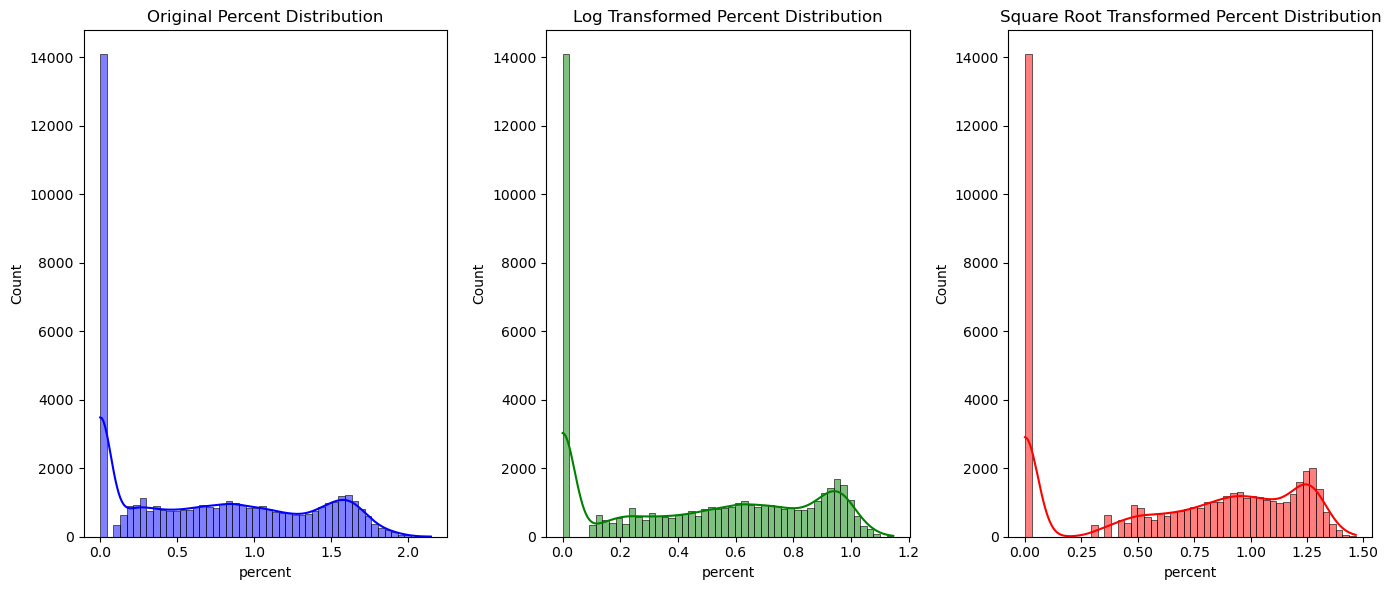

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(14, 6))

# Plot the original 'percent' distribution
plt.subplot(1, 3, 1)
sns.histplot(df['percent'], kde=True, color='blue', bins=50)
plt.title('Original Percent Distribution')

# Plot the log-transformed 'percent' distribution
plt.subplot(1, 3, 2)
sns.histplot(df['percent'].apply(np.log1p), kde=True, color='green', bins=50)
plt.title('Log Transformed Percent Distribution')

# Plot the square root-transformed 'percent' distribution
plt.subplot(1, 3, 3)
sns.histplot(df['percent'].apply(np.sqrt), kde=True, color='red', bins=50)
plt.title('Square Root Transformed Percent Distribution')

# Show the plots
plt.tight_layout()
plt.show()


### <FONT COLOR='GREEN'> z-score calculation

In [8]:
from scipy.stats import zscore

# Calculate Z-scores for all numeric columns
z_scores_all = zscore(numeric_colms)

# Create a new DataFrame with the Z-scores
z_scores_df = pd.DataFrame(z_scores_all, columns=numeric_colms.columns)

# Display the Z-scores for the first few rows
print(z_scores_df.head())


   mmwr_week      week   percent
0  -0.133001  1.092757 -0.514358
1  -0.177498  0.359343 -0.522254
2   1.468902  0.826061  2.097452
3   1.335410 -1.374179 -0.365924
4   1.428450  0.159322 -0.522254


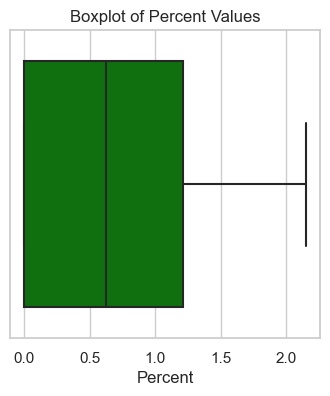

In [9]:
sns.set(style="whitegrid") 

# Creating the boxplot
plt.figure(figsize=(4, 4))  
sns.boxplot(x=df['percent'], color='green')
plt.title("Boxplot of Percent Values")
plt.xlabel("Percent")

# Show plot
plt.show()


## <FONT COLOR='GREEN'> DATA TRANSFORMATION

columns like season, data_source, essence_category, respiratory_category, visit_type, demographic_category, and demographic_group are likely categorical.
Most of the columns are nominal, so one-hot encoding has been used.

### <FONT COLOR='GREEN'> One-Hot Encoding



In [17]:
# One-Hot Encode categorical columns using pd.get_dummies

df_encoded = pd.get_dummies(df, columns=['season', 'data_source', 'essence_category', 
                                          'respiratory_category', 'visit_type', 
                                          'demographic_category', 'demographic_group'], drop_first=True)

In [18]:
# Check the data types to confirm the conversion
print(df_encoded.dtypes.head(10))


mmwr_week                int64
week                     int64
week_start              object
week_end                object
percent                float64
current_week_ending     object
season_2016-2017          bool
season_2017-2018          bool
season_2018-2019          bool
season_2019-2020          bool
dtype: object


week_start,week_end and current_week have object datatype so need to convert into datetime values
## <FONT COLOR='GREEN'> Converting week_start, week_end and current week ending to datetime:

In [19]:
# Convert 'week_start' and 'week_end' to datetime format
df_encoded['week_start'] = pd.to_datetime(df_encoded['week_start'], format='%m/%d/%Y')
df_encoded['week_end'] = pd.to_datetime(df_encoded['week_end'], format='%m/%d/%Y')
df_encoded['current_week_ending']=pd.to_datetime(df_encoded['current_week_ending'],format='%m/%d/%Y')

# Check the data types to confirm the conversion
print(df_encoded.dtypes.head(10))


mmwr_week                       int64
week                            int64
week_start             datetime64[ns]
week_end               datetime64[ns]
percent                       float64
current_week_ending    datetime64[ns]
season_2016-2017                 bool
season_2017-2018                 bool
season_2018-2019                 bool
season_2019-2020                 bool
dtype: object


### <FONT COLOR='GREEN'> Extracting Date Components: 
After converting the dates,extract specific components like the year, month,days or weekday.


In [20]:


# Extract the year, month, and weekday week start
df_encoded['start_year'] = df_encoded['week_start'].dt.year
df_encoded['start_month'] = df_encoded['week_start'].dt.month
df_encoded['start_day'] = df_encoded['week_start'].dt.day
df_encoded['start_weekday'] = df_encoded['week_start'].dt.weekday  # 0=Monday, 6=Sunday

#Extract the year, month, and weekday week end
df_encoded['end_year']=df_encoded['week_end'].dt.year
df_encoded['end_month']=df_encoded['week_end'].dt.month
df_encoded['end_day']=df_encoded['week_end'].dt.day
df_encoded['end_weekday']=df_encoded['week_end'].dt.weekday

#Extract the year, month, and weekday current week ending
df_encoded['current_week_ending_yr']=df_encoded['current_week_ending'].dt.year
df_encoded['current_week_ending_month']=df_encoded['current_week_ending'].dt.month
df_encoded['current_week_ending_day']=df_encoded['current_week_ending'].dt.day
df_encoded['current_week_ending_weekday']=df_encoded['current_week_ending'].dt.weekday



In [20]:
# Group by start month and calculate the mean percent of visits
start_mnt = df_encoded.groupby(['start_month'])['percent'].mean().reset_index()
print(start_mnt)

# Group by end month and calculate the mean percent of visits
end_mnt = df_encoded.groupby(['end_month'])['percent'].mean().reset_index()
print(end_mnt)

    start_month   percent
0             1  0.793660
1             2  0.748977
2             3  0.743456
3             4  0.690975
4             5  0.636342
5             6  0.554901
6             7  0.548213
7             8  0.595831
8             9  0.620823
9            10  0.660809
10           11  0.764158
11           12  0.867272
    end_month   percent
0           1  0.820080
1           2  0.759739
2           3  0.740150
3           4  0.704942
4           5  0.650410
5           6  0.567376
6           7  0.549039
7           8  0.581361
8           9  0.620929
9          10  0.643369
10         11  0.743235
11         12  0.851076


from 11 th month(november) to 2nd month(february) shows higher percent

In [21]:
# Drop the original datetime columns


df_encoded = df_encoded.drop(columns=['week_start', 'week_end', 'current_week_ending'])
df_encoded.head(10)

,mmwr_week,week,percent,season_2016-2017,season_2017-2018,season_2018-2019,season_2019-2020,season_2020-2021,season_2021-2022,season_2022-2023,...,start_day,start_weekday,end_year,end_month,end_day,end_weekday,current_week_ending_yr,current_week_ending_month,current_week_ending_day,current_week_ending_weekday
0,202043,43,0.220885,False,False,False,False,True,False,False,...,18,6,2020,10,24,5,2024,10,26,5
1,202032,32,0.000000,False,False,False,True,False,False,False,...,2,6,2020,8,8,5,2025,8,9,5
2,202439,39,1.693319,False,False,False,False,False,False,False,...,22,6,2024,9,28,5,2025,9,27,5
3,202406,6,0.829539,False,False,False,False,False,False,False,...,4,6,2024,2,10,5,2025,2,8,5
4,202429,29,0.000000,False,False,False,False,False,False,False,...,14,6,2024,7,20,5,2025,7,19,5
5,201649,49,1.643990,True,False,False,False,False,False,False,...,4,6,2016,12,10,5,2024,12,7,5
6,201826,26,0.220885,False,True,False,False,False,False,False,...,24,6,2018,6,30,5,2025,6,28,5
7,202424,24,1.561406,False,False,False,False,False,False,False,...,9,6,2024,6,15,5,2025,6,14,5
8,202437,37,0.308723,False,False,False,False,False,False,False,...,8,6,2024,9,14,5,2025,9,13,5
9,201629,29,0.967519,False,False,False,False,False,False,False,...,17,6,2016,7,23,5,2025,7,19,5


## <FONT COLOR='GREEN'> SPLITNG DATASET
### <FONT COLOR='GREEN'> Prepare features (X) and target variable (y):
predicting the percent column (the percentage of visits) and using all other columns as features.

In [22]:
from sklearn.model_selection import train_test_split

# Assuming 'percent' is the target variable
X = df_encoded.drop('percent', axis=1)  # Features
y = df_encoded['percent']                # Target variable


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (38371, 49) (38371,)
Test set shape: (9593, 49) (9593,)


**Training Set:**


* X_train: (38371, 49) — 38,371 samples and 49 features.
* y_train: (38371,) — 38,371 target values (which are the percent values).

**Test Set:**


*X_test: (9593, 49) — 9,593 samples and 49 features.
*y_test: (9593,) — 9,593 corresponding target values.

## <FONT COLOR='GREEN'> SCALING NUMERICAL FEATURES
## <FONT COLOR='GREEN'> StandardScaler

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical features
df_encoded[['mmwr_week', 'week']] = scaler.fit_transform(df_encoded[['mmwr_week', 'week']])

# Fit and transform the training data (X_train)
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (X_test) using the same scaler (to avoid data leakage)
X_test_scaled = scaler.transform(X_test)


## <FONT COLOR='GREEN'> DATA VISULIZATION

### <FONT COLOR='GREEN'>Univariate Analysis



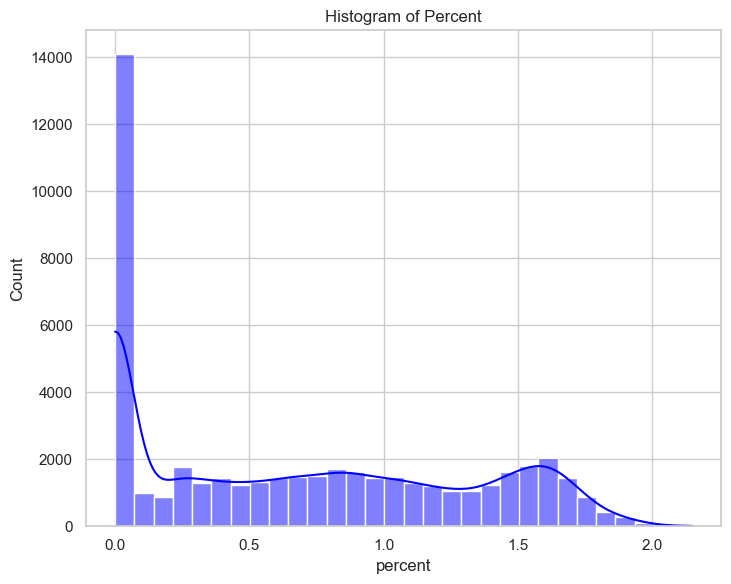

In [23]:
#Visualizing 'percent' feature with histogram and boxplot

plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['percent'], kde=True, color='blue', bins=30)
plt.title('Histogram of Percent')



plt.tight_layout()
plt.show()


## <FONT COLOR='GREEN'> Bivariate Analysis

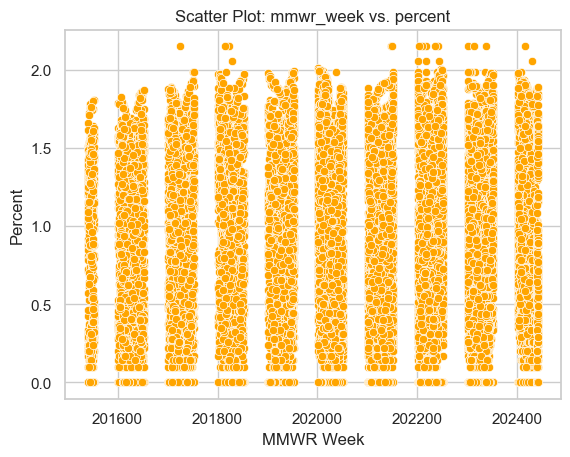

In [24]:
#scatter plot between 'mmwr_week' and 'percent'
sns.scatterplot(x=df['mmwr_week'], y=df['percent'], color='orange')
plt.title('Scatter Plot: mmwr_week vs. percent')
plt.xlabel('MMWR Week')
plt.ylabel('Percent')
plt.show()



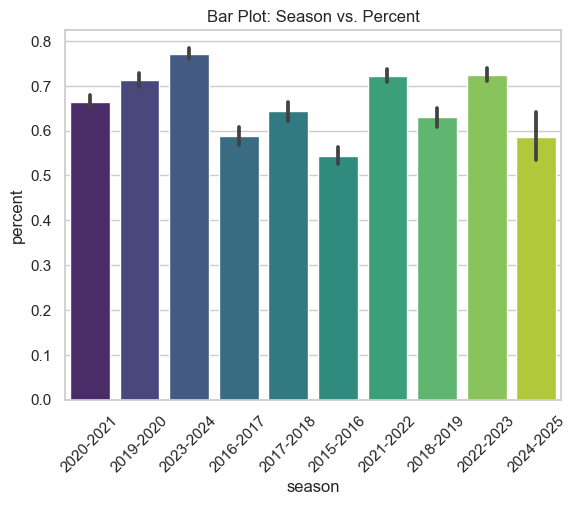

In [14]:
# Bar plot between 'season' and 'percent'
sns.barplot(x='season', y='percent', data=df, palette='viridis')
plt.title('Bar Plot: Season vs. Percent')
plt.xticks(rotation=45)
plt.show()

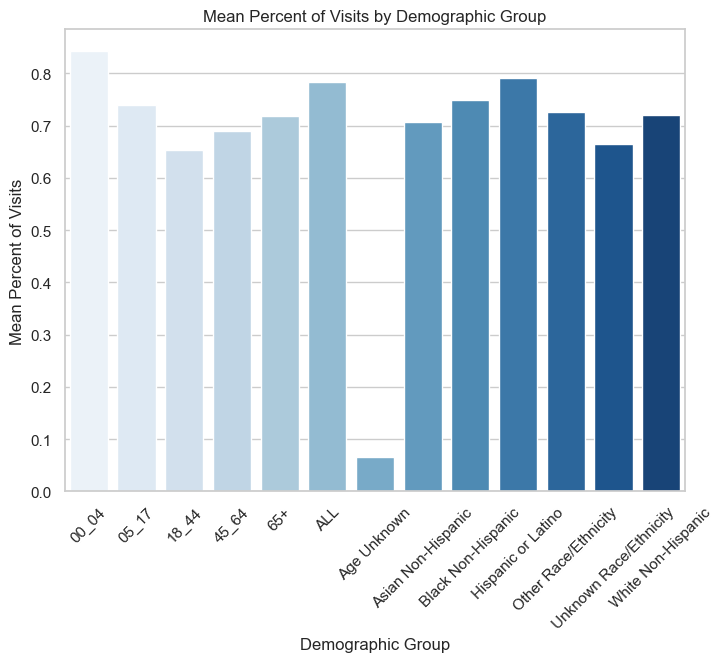

In [13]:
# Visualization: Demographic group vs mean percent
plt.figure(figsize=(8, 6))
sns.barplot(x='demographic_group', y='percent', data=demographic_stats, palette='Blues')
plt.title('Mean Percent of Visits by Demographic Group')
plt.xlabel('Demographic Group')
plt.ylabel('Mean Percent of Visits')
plt.xticks(rotation=45)
plt.show()


## <FONT COLOR='GREEN'> Multivariate Analysis

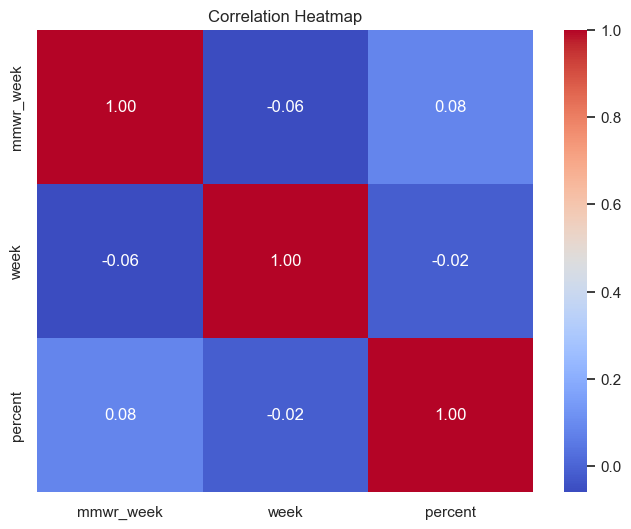

In [22]:


# Compute the correlation matrix
corr_matrix = df_encoded[['mmwr_week', 'week', 'percent']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# <FONT COLOR='GREEN'>  MODEL IMPLEMENTATION

### <FONT COLOR='GREEN'> Implementing and evaluating different regression models

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict using the model
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    
    mse =mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(f"{model_name} - MSE :{mse},MAE: {mae}, R²: {r2}")


Linear Regression - MSE :0.13159333834209955,MAE: 0.27743279115236846, R²: 0.6440371919979198
Decision Tree Regressor - MSE :0.03970551676710436,MAE: 0.09667211559516775, R²: 0.8925957239199359
Random Forest Regressor - MSE :0.022288448501826423,MAE: 0.08149163982261431, R²: 0.9397092678499085
Gradient Boosting Regressor - MSE :0.05778685202343881,MAE: 0.1765299529662533, R²: 0.8436853235048358
Support Vector Regressor - MSE :0.035071124904207066,MAE: 0.1171199122157314, R²: 0.9051318534967258


* **Best Model: Random Forest Regressor** has the lowest MSE (0.0223), MAE (0.0815), and highest R² (93.97%), making it the top performer for this dataset.

* **Second Best: Decision Tree Regressor** with an R² of 89.26%, MSE of 0.0397, and MAE of 0.0967.

* **Moderate Performance: Gradient Boosting Regressor** has a solid performance but doesn't outperform Decision Tree and Random Forest in this case.

* **Least Effective: Linear Regression** underperforms with an R² of only 64.4%, and higher MSE and MAE values compared to the other models.

## <FONT COLOR='GREEN'>  FEATURE IMPORTANCE

                                              Feature  Importance
0                                           mmwr_week    0.168147
18                           respiratory_category_ILI    0.142085
30                      demographic_group_Age Unknown    0.116469
14  essence_category_CDC Respiratory Syncytial Vir...    0.085861
19                     respiratory_category_Influenza    0.071260
20                           respiratory_category_RSV    0.067348
13               essence_category_CDC Influenza DD v1    0.065492
12          essence_category_CDC COVID-Specific DD v1    0.049249
17                      respiratory_category_COVID-19    0.049156
1                                                week    0.038904


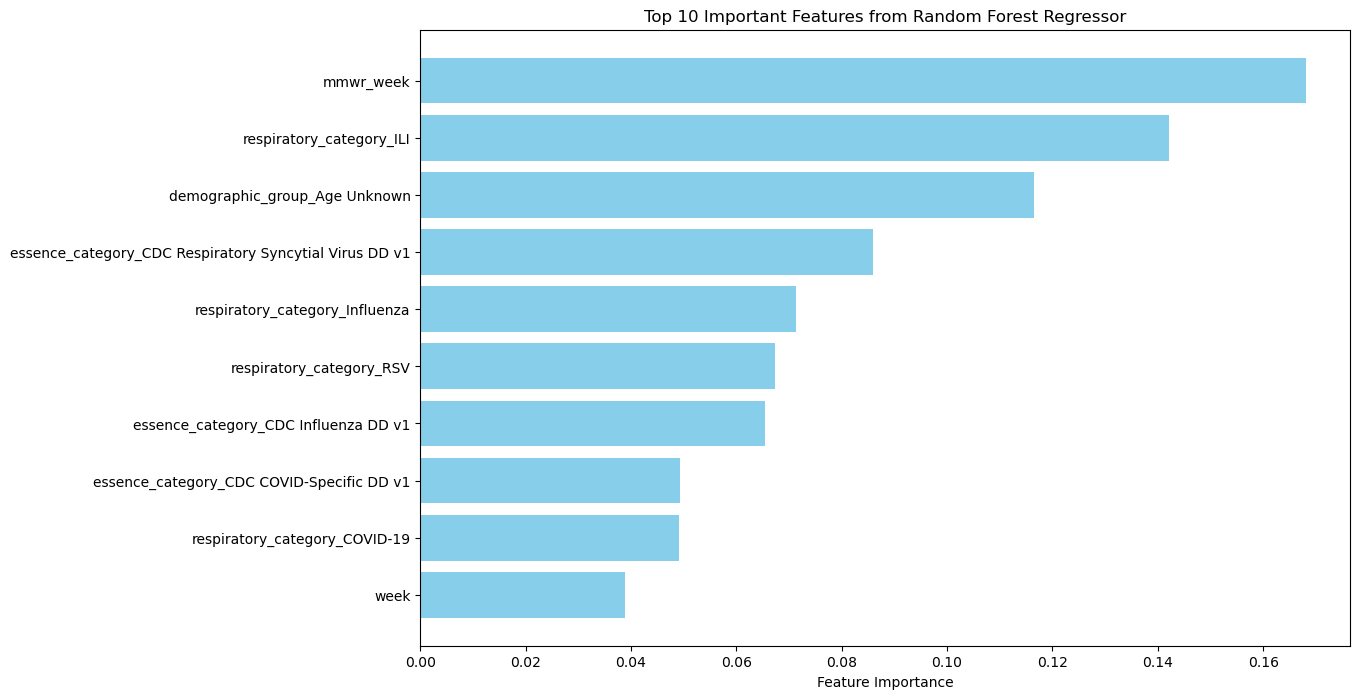

In [26]:
# Extract feature importance from the Random Forest Regressor
feature_importance = models['Random Forest Regressor'].feature_importances_

# Create a DataFrame to map feature importance with feature names
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print(feature_importance_df.head(10))

# Plotting the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features from Random Forest Regressor')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


### <FONT COLOR='GREEN'> Comparing Training and Test Performance

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to check overfitting
def check_overfitting(model, X_train, y_train, X_test, y_test):
    # Predict on training data
    y_train_pred = model.predict(X_train)
    
    # Predict on test data
    y_test_pred = model.predict(X_test)
    
    # Evaluate on training data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    # Evaluate on test data
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Print results
    print(f"Training Performance:")
    print(f"MSE: {mse_train}, MAE: {mae_train}, R²: {r2_train}")
    print(f"Test Performance:")
    print(f"MSE: {mse_test}, MAE: {mae_test}, R²: {r2_test}")
    
    # Compare training and test performance
    print("\nDifference between training and test performance:")
    print(f"MSE Difference: {mse_train - mse_test}")
    print(f"MAE Difference: {mae_train - mae_test}")
    print(f"R² Difference: {r2_train - r2_test}")

# Check for overfitting on the best model (e.g., Random Forest Regressor)
check_overfitting(models['Random Forest Regressor'], X_train_scaled, y_train, X_test_scaled, y_test)


Training Performance:
MSE: 0.0032878237229429686, MAE: 0.030688755664606104, R²: 0.9911477792975703
Test Performance:
MSE: 0.022288448501826423, MAE: 0.08149163982261431, R²: 0.9397092678499085

Difference between training and test performance:
MSE Difference: -0.019000624778883455
MAE Difference: -0.05080288415800821
R² Difference: 0.05143851144766176


The small differences in MSE, MAE, and R² between the training and test datasets suggest that the model is generalizing well. It is not overfitting, as there's no large gap between the training and test performance.

## <FONT COLOR='GREEN'> CONCLUSION

This project focused on predicting the percentage of visits (percent) using various machine learning regression models. After preprocessing the data, which involved one-hot encoding categorical variables and scaling numerical features, different regression models were implemented and evaluated. The Random Forest Regressor emerged as the top-performing model with the best accuracy (R² = 93.97%) and the lowest error metrics (MSE = 0.0223, MAE = 0.0815). It demonstrated strong generalization, with minimal overfitting observed. In comparison, the Decision Tree Regressor and Gradient Boosting Regressor also showed solid performance, while Linear Regression underperformed. The key takeaway is that the Random Forest Regressor offers the most reliable predictions for this dataset.